In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
import os
import random
import cv2
import math
%matplotlib inline

In [4]:
import imageio
import imgaug.augmenters as iaa
import imgaug as ia

In [5]:

from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [6]:
#visualizing the data
nonviolence_directory = (r"C:\Users\User\Desktop\NEW PROJECT\Real Life Violence Dataset\NonViolence")
violence_directory = (r"C:\Users\User\Desktop\NEW PROJECT\Real Life Violence Dataset\Violence")

In [7]:
#retrieve the list of all video files present in each of the directories
NonViolence_files_names_list = os.listdir(nonviolence_directory)
Violence_files_names_list = os.listdir(violence_directory)


In [6]:
#selecting a random video file from the classes directory
Random_NonViolence_Video = random.choice(NonViolence_files_names_list)
Random_Violence_Video = random.choice(Violence_files_names_list)

play random nonviolence videos

In [7]:
NonViolence_files_names_list

['NV_1.mp4',
 'NV_10.mp4',
 'NV_100.mp4',
 'NV_1000.mp4',
 'NV_101.mp4',
 'NV_102.mp4',
 'NV_103.mp4',
 'NV_104.mp4',
 'NV_105.mp4',
 'NV_106.mp4',
 'NV_107.mp4',
 'NV_108.mp4',
 'NV_109.mp4',
 'NV_11.mp4',
 'NV_110.mp4',
 'NV_111.mp4',
 'NV_112.mp4',
 'NV_113.mp4',
 'NV_114.mp4',
 'NV_115.mp4',
 'NV_116.mp4',
 'NV_117.mp4',
 'NV_118.mp4',
 'NV_119.mp4',
 'NV_12.mp4',
 'NV_120.mp4',
 'NV_121.mp4',
 'NV_122.mp4',
 'NV_123.mp4',
 'NV_124.mp4',
 'NV_125.mp4',
 'NV_126.mp4',
 'NV_127.mp4',
 'NV_128.mp4',
 'NV_129.mp4',
 'NV_13.mp4',
 'NV_130.mp4',
 'NV_131.mp4',
 'NV_132.mp4',
 'NV_133.mp4',
 'NV_134.mp4',
 'NV_135.mp4',
 'NV_136.mp4',
 'NV_137.mp4',
 'NV_138.mp4',
 'NV_139.mp4',
 'NV_14.mp4',
 'NV_140.mp4',
 'NV_141.mp4',
 'NV_142.mp4',
 'NV_143.mp4',
 'NV_144.mp4',
 'NV_145.mp4',
 'NV_146.mp4',
 'NV_147.mp4',
 'NV_148.mp4',
 'NV_149.mp4',
 'NV_15.mp4',
 'NV_150.mp4',
 'NV_151.mp4',
 'NV_152.mp4',
 'NV_153.mp4',
 'NV_154.mp4',
 'NV_155.mp4',
 'NV_156.mp4',
 'NV_157.mp4',
 'NV_158.mp4',
 '

play random violence videos

In [8]:
Violence_files_names_list

['V_1.mp4',
 'V_10.mp4',
 'V_100.mp4',
 'V_1000.mp4',
 'V_101.mp4',
 'V_102.mp4',
 'V_103.mp4',
 'V_104.mp4',
 'V_105.mp4',
 'V_106.mp4',
 'V_107.mp4',
 'V_108.mp4',
 'V_109.mp4',
 'V_11.mp4',
 'V_110.mp4',
 'V_111.mp4',
 'V_112.mp4',
 'V_113.mp4',
 'V_114.mp4',
 'V_115.mp4',
 'V_116.mp4',
 'V_117.mp4',
 'V_118.mp4',
 'V_119.mp4',
 'V_12.mp4',
 'V_120.mp4',
 'V_121.mp4',
 'V_122.mp4',
 'V_123.mp4',
 'V_124.mp4',
 'V_125.mp4',
 'V_126.mp4',
 'V_127.mp4',
 'V_128.mp4',
 'V_129.mp4',
 'V_13.mp4',
 'V_130.mp4',
 'V_131.mp4',
 'V_132.mp4',
 'V_133.mp4',
 'V_134.mp4',
 'V_135.mp4',
 'V_136.mp4',
 'V_137.mp4',
 'V_138.mp4',
 'V_139.mp4',
 'V_14.mp4',
 'V_140.mp4',
 'V_141.mp4',
 'V_142.mp4',
 'V_143.mp4',
 'V_144.mp4',
 'V_145.mp4',
 'V_146.mp4',
 'V_147.mp4',
 'V_148.mp4',
 'V_149.mp4',
 'V_15.mp4',
 'V_150.mp4',
 'V_151.mp4',
 'V_152.mp4',
 'V_153.mp4',
 'V_154.mp4',
 'V_155.mp4',
 'V_156.mp4',
 'V_157.mp4',
 'V_158.mp4',
 'V_159.mp4',
 'V_16.mp4',
 'V_160.mp4',
 'V_161.mp4',
 'V_162.mp4',


EXTRACTING FRAMES 

In [9]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 224, 224
 
# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 15
 

DATASET_DIR = r"C:\Users\User\Desktop\NEW PROJECT\Real Life Violence Dataset"
 
CLASSES_LIST = ["NonViolence","Violence"]

In [10]:
def frames_extraction(video_path):
 
    frames_list = []
    
    # Read the Video File
    video_reader = cv2.VideoCapture(video_path)
 
    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
 
    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
         # Reading the frame from the video. 
        success, image = video_reader.read() 
        
        # Apply image augmentation
        
        #flip = iaa.Fliplr(1.0)
        zoom = iaa.Affine(scale=1.3)
        random_brightness = iaa.Multiply((1, 1.3))
        #rotate = iaa.Affine(rotate=(-25, 25))
                
        #image_aug = flip(image = image)
        image_aug = random_brightness(image = image)
        image_aug = zoom(image = image_aug)
        #image_aug = rotate(image = image_aug)
        
        if not success:
            break
            # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(image_aug, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
 
    video_reader.release()
 
    return frames_list

CREATING THE DATASET

In [11]:
def create_dataset():
 
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes.
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        # 
        for file_name in files_list[:90]: # specific number video per class
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
 
            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)
 
            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:
 
                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
 
    features = np.asarray(features)
    labels = np.array(labels)  
    return features, labels, video_files_paths

CREATE THE DATASET

In [13]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: NonViolence
Extracting Data of Class: Violence


In [14]:
# Saving the extracted data
np.save("features.npy",features)
np.save("labels.npy",labels)
np.save("video_files_paths.npy",video_files_paths)

#os.remove("features.npy")
#os.remove("labels.npy")
#os.remove("video_files_paths.npy")

ENCODING AND SPLITTING TRAINING-TESTING SETS

In [15]:
# Split the Data into Train ( 80% ) and Test Set ( 20% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.3,
                                                                            shuffle = True, random_state = 38)

In [16]:
print(features_train.shape,labels_train.shape )
print(features_test.shape, labels_test.shape)

(126, 15, 224, 224, 3) (126,)
(54, 15, 224, 224, 3) (54,)


IMPORTING MODEL AND FINE-TUNING IT

USING MOBILENET_V2

In [17]:
from keras.applications.mobilenet_v2 import MobileNetV2
my_model = MobileNetV2(include_top = False , weights="imagenet")

#Fine-Tuning to make the last 40 layer trainable
my_model.trainable = False

#my_model.summary()

MODEL BUILDING

In [18]:
def create_model():
     
    lstm_fw = LSTM(units=32)
    lstm_bw = LSTM(units=32, go_backwards = True)  
    optimizers = tf.keras.optimizers
     #Specifying Input to match features shape
    model = Sequential([Input(shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)),# Passing mobilenet in the TimeDistributed layer to handle the sequence
    TimeDistributed(my_model),
    Dropout(0.25),              
    # Time distributed
    TimeDistributed(Flatten()),
    
    Bidirectional(lstm_fw, backward_layer = lstm_bw),
    Dropout(0.25),
        # Layer 1
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(128,activation='relu'),
    Dropout(0.25),
        # Layer 3
    Dense(64,activation='relu'),
    Dropout(0.25),
     #  Layer 4
    Dense(32,activation='relu'),
    Dropout(0.25),
        # #Layer 1
        # softmax
    Dense(1, activation = 'sigmoid')
    ])
    
    adam = optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    # Compiling the model 
    #model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ["accuracy"])
 
    model.summary()
    
    return model

input_size – The number of expected features in the input x

hidden_size – The number of features in the hidden state h

num_layers – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two LSTMs together to form a stacked LSTM, with the second LSTM taking in outputs of the first LSTM and computing the final results. Default: 1

bias – If False, then the layer does not use bias weights b_ih and b_hh. Default: True

batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False

dropout – If non-zero, introduces a Dropout layer on the outputs of each LSTM layer except the last layer, with dropout probability equal to dropout. Default: 0

bidirectional – If True, becomes a bidirectional LSTM. Default: False

CONSTRUCTING THE MODEL

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 15, 7, 7, 1280)   2257984   
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 15, 7, 7, 1280)    0         
                                                                 
 time_distributed_1 (TimeDis  (None, 15, 62720)        0         
 tributed)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16064768  
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

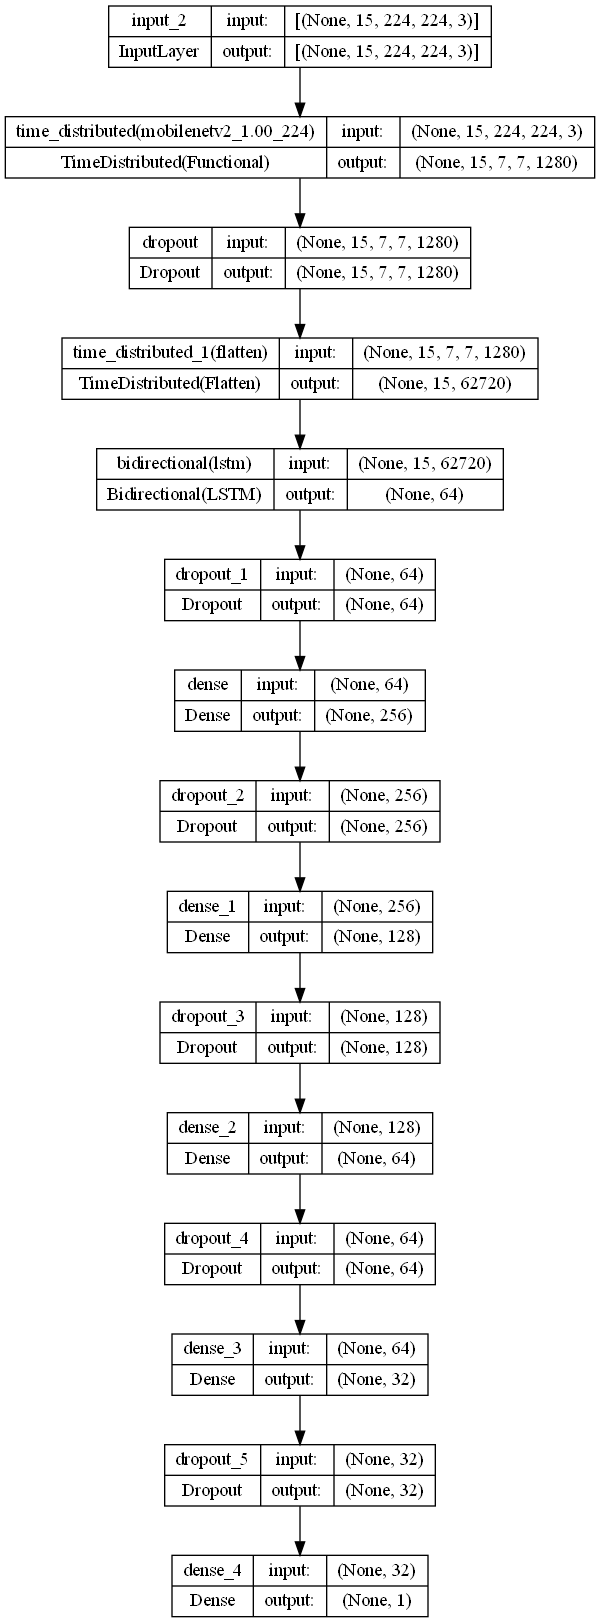

In [19]:
my_LSTM_model = create_model()

# Plot the structure of the contructed LRCN model.
plot_model(my_LSTM_model, to_file = 'my_LSTM_model_structure_plot.png', show_shapes = True, show_layer_names = True)


SPECIFYING CALLBACKS

In [20]:
patience = 5

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.0005

batch_size = 8
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

CREATING EARLY STOPBACKS TO MONITOR THE ACCURACY

In [21]:
# Create Early Stopping Callback to monitor the accuracy
early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', 
                                        patience = 5, restore_best_weights=True)

# Create checkpoint for model
# Change name for model

checkpoint_filepath = 'ModelWeights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        verbose = 1,
                                        save_best_only=True)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                               factor=0.8,
                                                  patience=3,
                                                  min_lr=0.00001,
                                                  verbose=1)
callbacks = [lr_callback, early_stopping_callback, reduce_lr]

FITTING THE MODEL

In [2]:
my_LSTM_model_history = my_LSTM_model.fit(x = features_train, y = labels_train, epochs = 20, batch_size = 8 ,
                                             shuffle = True, validation_split = 0.2, callbacks = callbacks)

NameError: name 'my_LSTM_model' is not defined

In [23]:
model_evaluation_history = my_LSTM_model.evaluate(features_test, labels_test)

2/2 [==============================] - 20s 6s/step - loss: 0.5963 - accuracy: 0.8889


In [1]:
my_LSTM_model.save('violence_model.h5')

NameError: name 'my_LSTM_model' is not defined

MODEL EVALUATION

In [25]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Get the Epochs Count
    epochs = range(len(metric_value_1))
 
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'orange', label = metric_name_2)
 
    plt.title(str(plot_name))
 
    plt.legend()

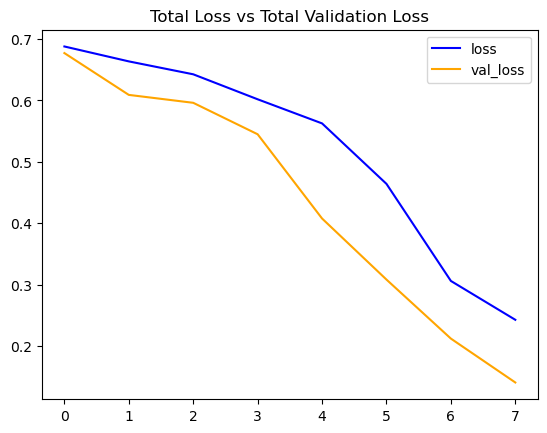

In [26]:
plot_metric(my_LSTM_model_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

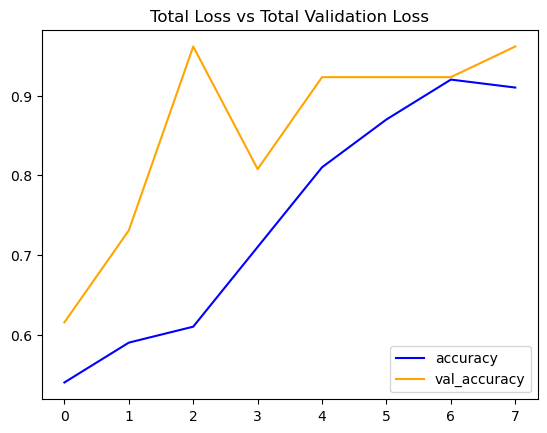

In [27]:
plot_metric(my_LSTM_model_history, 'accuracy', 'val_accuracy', 'Total Loss vs Total Validation Loss')

In [28]:
##predicting the test set
labels_predict = my_LSTM_model.predict(features_test)

2/2 [==============================] - 18s 6s/step


In [29]:
labels_predict

array([[0.41810533],
       [0.5957363 ],
       [0.43475416],
       [0.38589692],
       [0.45487007],
       [0.51484543],
       [0.51128966],
       [0.45086348],
       [0.40173483],
       [0.53900486],
       [0.5539073 ],
       [0.5374731 ],
       [0.5167455 ],
       [0.4509422 ],
       [0.55296797],
       [0.49017262],
       [0.40321997],
       [0.48788235],
       [0.49124137],
       [0.4225498 ],
       [0.40750638],
       [0.41865543],
       [0.5314222 ],
       [0.5440134 ],
       [0.46473536],
       [0.5025279 ],
       [0.39216936],
       [0.53896976],
       [0.44566587],
       [0.54893625],
       [0.4332596 ],
       [0.47699884],
       [0.48128554],
       [0.59520876],
       [0.5144111 ],
       [0.57243645],
       [0.5850103 ],
       [0.5883393 ],
       [0.48028314],
       [0.44293004],
       [0.3998174 ],
       [0.5105828 ],
       [0.5344386 ],
       [0.45148373],
       [0.46121663],
       [0.4075638 ],
       [0.58320194],
       [0.532

In [30]:
labels_predict = [int(p>= 0.5) for p in labels_predict]
labels_predict

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0]

In [31]:
labels_test

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [35]:
len(labels_test), len(labels_predict)

(54, 54)

ACCURACY SCORE

In [33]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [36]:
accuracy_score(labels_predict, labels_test)

0.8888888888888888

In [39]:
confusion_matrix(labels_predict, labels_test)

array([[25,  5],
       [ 1, 23]], dtype=int64)

In [41]:
print(classification_report(labels_predict, labels_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.82      0.96      0.88        24

    accuracy                           0.89        54
   macro avg       0.89      0.90      0.89        54
weighted avg       0.90      0.89      0.89        54



PREDICTING FRAME BY FRAME

In [ ]:
#import os
#os.getcwd()

In [42]:
def predict_frames(video_file_path, output_file_path, SEQUENCE_LENGTH):
    
    # Read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # VideoWriter to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('m', 'p', '4', 'v'), 
                                    video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
 
    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
 
    # Store the predicted class in the video.
    predicted_class_name = ''
 
    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():
 
        ok, frame = video_reader.read() 
        
        if not ok:
            break
 
        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame 
        normalized_frame = resized_frame / 255
 
        # Appending the pre-processed frame into the frames list.
        frames_queue.append(normalized_frame)
 
        # We Need at Least number of SEQUENCE_LENGTH Frames to perform a prediction.
        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(frames_queue) == SEQUENCE_LENGTH:                        
 
            # Pass the normalized frames to the model and get the predicted probabilities.
            predicted_labels_probabilities = my_LSTM_model.predict(np.expand_dims(frames_queue, axis = 0))[0]
 
            # Get the index of class with highest probability.
            predicted_label = np.argmax(predicted_labels_probabilities)
 
            # Get the class name using the retrieved index.
            predicted_class_name = CLASSES_LIST[predicted_label]
 
        # Write predicted class name on top of the frame.
        if predicted_class_name == "Violence":
            cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 12)
        else:
            cv2.putText(frame, predicted_class_name, (5, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 12)
         
        # Write The frame into the disk using the VideoWriter
        video_writer.write(frame)                       
        
    video_reader.release()
    video_writer.release()

In [43]:
plt.style.use("default")

# To show Random Frames from the saved output predicted video (output predicted video doesn't show on the notebook but can be downloaded)
def show_pred_frames(pred_video_path): 

    plt.figure(figsize=(20,15))

    video_reader = cv2.VideoCapture(pred_video_path)

    # Get the number of frames in the video.
    frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Get Random Frames from the video then Sort it
    random_range = sorted(random.sample(range (SEQUENCE_LENGTH , frames_count ), 12))
        
    for counter, random_index in enumerate(random_range, 1):
        
        plt.subplot(5, 4, counter)

        # Set the current frame position of the video.  
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, random_index)
          
        ok, frame = video_reader.read() 

        if not ok:
            break 

        frame = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)

        plt.imshow(frame)
                            
    video_reader.release()

In [44]:
# Construct the output video path.
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)
 
output_video_file_path = f'{test_videos_directory}/Output-Test-Video.mp4'

1/1 [==============================] - 0s 315ms/step


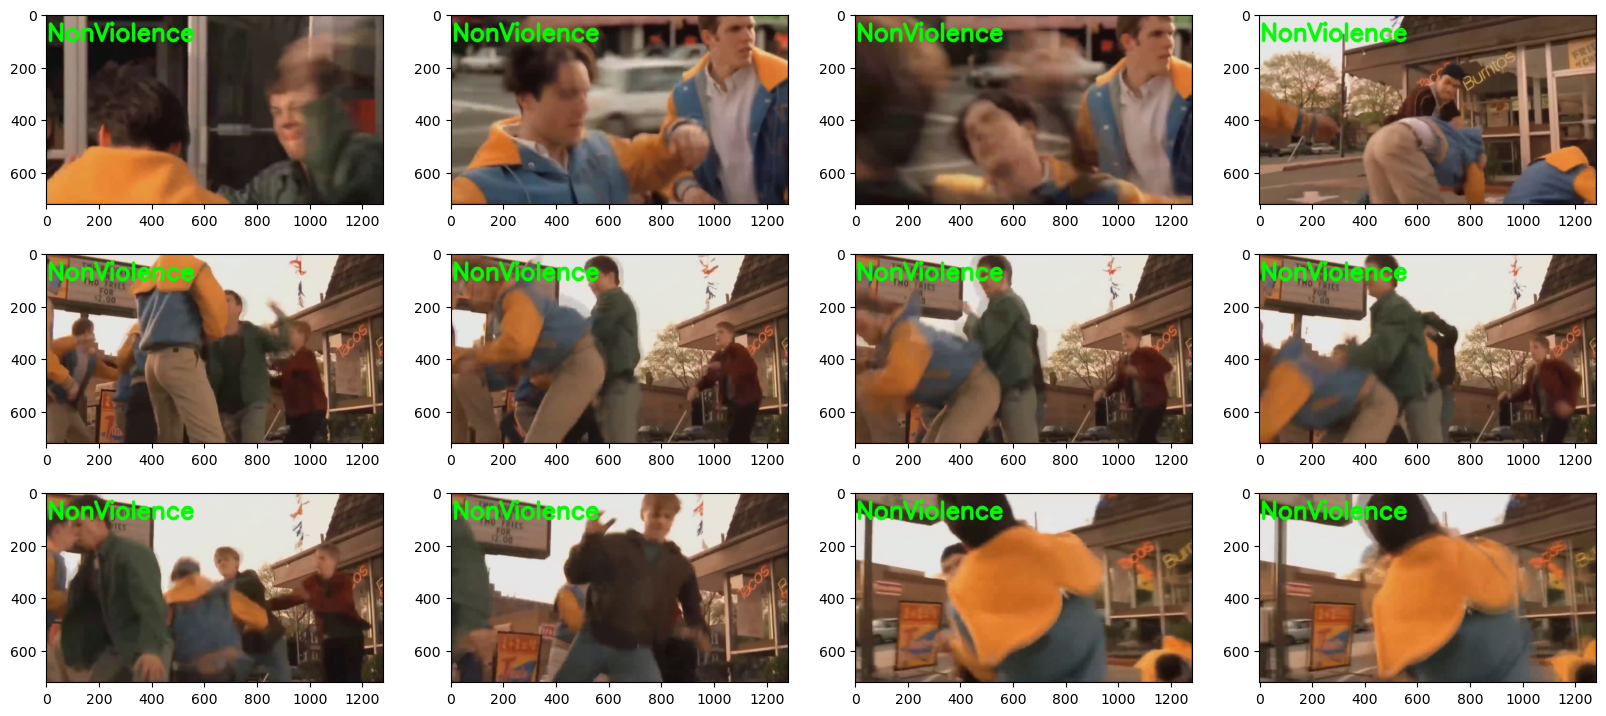

In [45]:
# Specifying video to be predicted
input_video_file_path = r"C:\Users\User\Desktop\NEW PROJECT\Real Life Violence Dataset\Violence\V_41.mp4"

# Perform Prediction on the Test Video.
predict_frames(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)

# Show random frames from the output video
show_pred_frames(output_video_file_path)

In [46]:
from IPython.display import HTML
from base64 import b64encode

# To Show a Video in Notebook
def Play_Video(filepath):
    html = ''
    video = open(filepath,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=640 muted controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

In [ ]:
#Play_Video(r"C:\Users\User\Desktop\NEW PROJECT\Real Life Violence Dataset\Violence\V_41.mp4")

In [47]:
def predict_video(video_file_path, SEQUENCE_LENGTH):
 
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # Declare a list to store video frames we will extract.
    frames_list = []
    
    # Store the predicted class in the video.
    predicted_class_name = ''
 
    # Get the number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)
 
    # Iterating the number of times equal to the fixed length of sequence.
    for frame_counter in range(SEQUENCE_LENGTH):
 
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        success, frame = video_reader.read() 
 
        if not success:
            break
 
        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame.
        normalized_frame = resized_frame / 255
        
        # Appending the pre-processed frame into the frames list
        frames_list.append(normalized_frame)
 
    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    predicted_labels_probabilities = my_LSTM_model.predict(np.expand_dims(frames_list, axis = 0))[0]
 
    # Get the index of class with highest probability.
    predicted_label = np.argmax(predicted_labels_probabilities)
 
    # Get the class name using the retrieved index.
    predicted_class_name = CLASSES_LIST[predicted_label]
    
    # Display the predicted class along with the prediction confidence.
    print(f'Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')
        
    video_reader.release()

In [48]:
# Specifying video to be predicted
input_video_file_path = r"C:\Users\User\Desktop\NEW PROJECT\Real Life Violence Dataset\Violence\V_100.mp4"

# Perform Single Prediction on the Test Video.
predict_video(input_video_file_path, SEQUENCE_LENGTH)

# Play the actual video
Play_Video(input_video_file_path)

1/1 [==============================] - 0s 267ms/step
Predicted: NonViolence
Confidence: 0.4867018759250641
